In [ ]:
import torch
import numpy as np
from QEDark3 import QEDark
from QEDarkConstants import lightSpeed_kmpers
import matplotlib.pyplot as plt
import matplotlib
# mediator = "LM"
mediator = "Scr"
sigmaP = 1e-34
from QEDarkConstants import ccms,sec2yr,lightSpeed,lightSpeed_kmpers

QE_Modulated_Halo = QEDark()
QE_Modulated_Halo.update_params(220,232,544,0.3e9,1e-36)

q_tensor = torch.arange(1,QE_Modulated_Halo.nq+1)
Ee_tensor = torch.arange(QE_Modulated_Halo.Emin,QE_Modulated_Halo.Emax,step = QE_Modulated_Halo.dE)
test_mX = 2.7 #MeV
halo_model = 'modulated'
FDMn = 0

vMins = QE_Modulated_Halo.DM_Halo.vmin_tensor(Ee_tensor,q_tensor,test_mX*1e6)*lightSpeed_kmpers
fig,ax = plt.subplots(figsize=(15,10))
shm_eta = QE_Modulated_Halo.get_halo_data(test_mX*1e6,q_tensor,Ee_tensor,FDMn,'imb')
prefactor =ccms**2*sec2yr*QE_Modulated_Halo.rhoX/test_mX * QE_Modulated_Halo.cross_section #turns s/cm into 1/year
updated_eta =shm_eta/prefactor 
updated_eta*= 1e11
# shm_eta*=1e5
cmap = plt.get_cmap('viridis', 35) 
norm = matplotlib.colors.Normalize(vmin=0, vmax=180) 

for isoangle in range(0,35):
    fname = f'./halo_data/modulated/Parameter_Scan_{mediator}/mDM_2_7_MeV_sigmaP_{sigmaP}_cm2/DM_Eta_theta_{isoangle}.txt'
    # fname_DAMASCUS = f'./DaMaSCUS/results/5MeV_test_histograms/eta.{isoangle}'
    fdata = np.loadtxt(fname,delimiter='\t')
    vmin = fdata[:,0]
    eta = fdata[:,1]

    ax.plot(vmin,eta,color=cmap(isoangle))

ax.set_xlim([0, 800])


# EE_Index = 0
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm) 
# for i in range(35):
#     ax.plot(vMins[EE_Index,:],all_etas[i][EE_Index,:],color=cmap(i))
# ax.set_xlim([0, 800])
ax.plot(vMins[0,1:],updated_eta[0,1:],linewidth=4,ls=':',color='black',label='SHM')
ax.legend()
ax.set_xlabel('$v_{min}$ km/s')
ax.set_ylabel('η s/km')
plt.colorbar(sm,ax=ax)
fig.suptitle('From Timon $m_{dm}$' + f' = {test_mX} σ$_P$ = {sigmaP} cm$^2$',fontsize=32)
plt.tight_layout()


In [ ]:
def plot_damascus_output(dirname,mX,num_angles=60,rhoX = 0.3,heavy=True):
    import torch
    import numpy as np
    from QEDark3 import QEDark
    from QEDarkConstants import lightSpeed_kmpers
    import matplotlib.pyplot as plt
    import matplotlib
    if heavy:
        mediator_title='Heavy'
    else:
        mediator_title='Light'
    QE_Modulated_Halo = QEDark()

    QE_Modulated_Halo.update_params(220,232,544,0.3e9,1e-36)
    q_tensor = torch.arange(1,QE_Modulated_Halo.nq+1)
    Ee_tensor = torch.arange(QE_Modulated_Halo.Emin,QE_Modulated_Halo.Emax,step = QE_Modulated_Halo.dE)
    FDMn = 0
    vMins = QE_Modulated_Halo.DM_Halo.vmin_tensor(Ee_tensor,q_tensor,mX*1e6)*lightSpeed_kmpers
    fig,ax = plt.subplots(figsize=(15,10))

    shm_eta = QE_Modulated_Halo.get_halo_data(mX*1e6,q_tensor,Ee_tensor,FDMn,'imb')
    prefactor =ccms**2*sec2yr*QE_Modulated_Halo.rhoX/test_mX * QE_Modulated_Halo.cross_section #turns s/cm into 1/year
    shm_eta/=prefactor 
    shm_eta*=1e11

    cmap = plt.get_cmap('viridis', num_angles) 
    norm = matplotlib.colors.Normalize(vmin=0, vmax=180) 
    km = 5.067*1e18
    s = 1.51905*1e24

    fname_rhoDam = f'../../../../DaMaSCUS/results/{dirname}.rho'
    fdata = np.loadtxt(fname_rhoDam,delimiter='\t')
    rho = fdata[:,1]
    for isoangle in range(0,num_angles):
        fname_DAMASCUS = f'../../../../DaMaSCUS/results/{dirname}_histograms/eta.{isoangle}'
        
        fdata = np.loadtxt(fname_DAMASCUS,delimiter='\t')
        vmin = fdata[:,0] * s/km
        eta = fdata[:,1]*km/s
        eta*=(rho[isoangle]/rhoX)
        ax.plot(vmin,eta,color=cmap(isoangle))

    



    ax.set_xlim([0, 800])


    # EE_Index = 0
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm) 
    # for i in range(35):
    #     ax.plot(vMins[EE_Index,:],all_etas[i][EE_Index,:],color=cmap(i))
    # ax.set_xlim([0, 800])


    ax.plot(vMins[0,1:],shm_eta[0,1:],linewidth=4,ls=':',color='black',label='SHM')
    ax.legend()
    ax.set_xlabel('$v_{min}$ km/s')
    ax.set_ylabel('η s/km')
    plt.colorbar(sm,ax=ax)

    fig.suptitle('Ansh Recreation $ m_{dm}$' + f' = {mX} σ$_P$ = {1e-34} cm$^2$ {mediator_title}',fontsize=32)
    plt.tight_layout()


In [10]:
import sys
sys.path.append('../QEDark/')
def plot_damascus_output(dirname,test_mX,sigmaP,num_angles=60,rhoX = 0.3,heavy=True):
    import torch
    import numpy as np
    from QEDark3 import QEDark
    from QEDarkConstants import lightSpeed_kmpers,ccms,sec2yr
    import matplotlib.pyplot as plt
    import matplotlib
    if heavy:
        mediator_title='Charge Screened Heavy Mediator'
    else:
        mediator_title='Light Mediator'
    QE_Modulated_Halo = QEDark()

    QE_Modulated_Halo.update_params(220,232,544,0.3e9,1e-36)
    q_tensor = torch.arange(1,QE_Modulated_Halo.nq+1)
    Ee_tensor = torch.arange(QE_Modulated_Halo.Emin,QE_Modulated_Halo.Emax,step = QE_Modulated_Halo.dE)
    FDMn = 0
    vMins = QE_Modulated_Halo.DM_Halo.vmin_tensor(Ee_tensor,q_tensor,test_mX*1e6)*lightSpeed_kmpers
    fig,ax = plt.subplots(figsize=(15,10))

    shm_eta = QE_Modulated_Halo.get_halo_data(test_mX*1e6,q_tensor,Ee_tensor,FDMn,'imb')
    prefactor =ccms**2*sec2yr*QE_Modulated_Halo.rhoX/test_mX * QE_Modulated_Halo.cross_section #turns s/cm into 1/year
    shm_eta/=prefactor 
    shm_eta*=1e11

    cmap = plt.get_cmap('viridis', num_angles) 
    norm = matplotlib.colors.Normalize(vmin=0, vmax=180) 
    km = 5.067*1e18
    s = 1.51905*1e24

    fname_rhoDam = f'./results/{dirname}.rho'
    fdata = np.loadtxt(fname_rhoDam,delimiter='\t')
    rho = fdata[:,1]
    for isoangle in range(0,num_angles):
        fname_DAMASCUS = f'./results/{dirname}_histograms/eta.{isoangle}'
        
        fdata = np.loadtxt(fname_DAMASCUS,delimiter='\t')
        vmin = fdata[:,0] * s/km
        eta = fdata[:,1]*km/s
        # print(rho[isoangle]/rhoX,rhoX,rho[isoangle])
        eta*=(rho[isoangle]/rhoX)
        ax.plot(vmin,eta,color=cmap(isoangle))

    



    ax.set_xlim([0, 800])


    # EE_Index = 0
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm) 
    # for i in range(35):
    #     ax.plot(vMins[EE_Index,:],all_etas[i][EE_Index,:],color=cmap(i))
    # ax.set_xlim([0, 800])


    ax.plot(vMins[0,1:],shm_eta[0,1:],linewidth=4,ls=':',color='black',label='SHM')
    ax.legend()
    ax.set_xlabel('$v_{min}$ km/s')
    ax.set_ylabel('η s/km')
    plt.colorbar(sm,ax=ax)

    fig.suptitle('Eta Distribution $ m_{dm}$' + f' = {test_mX} σ$_P$ = {sigmaP} cm$^2$ {mediator_title}',fontsize=32)
    plt.tight_layout()


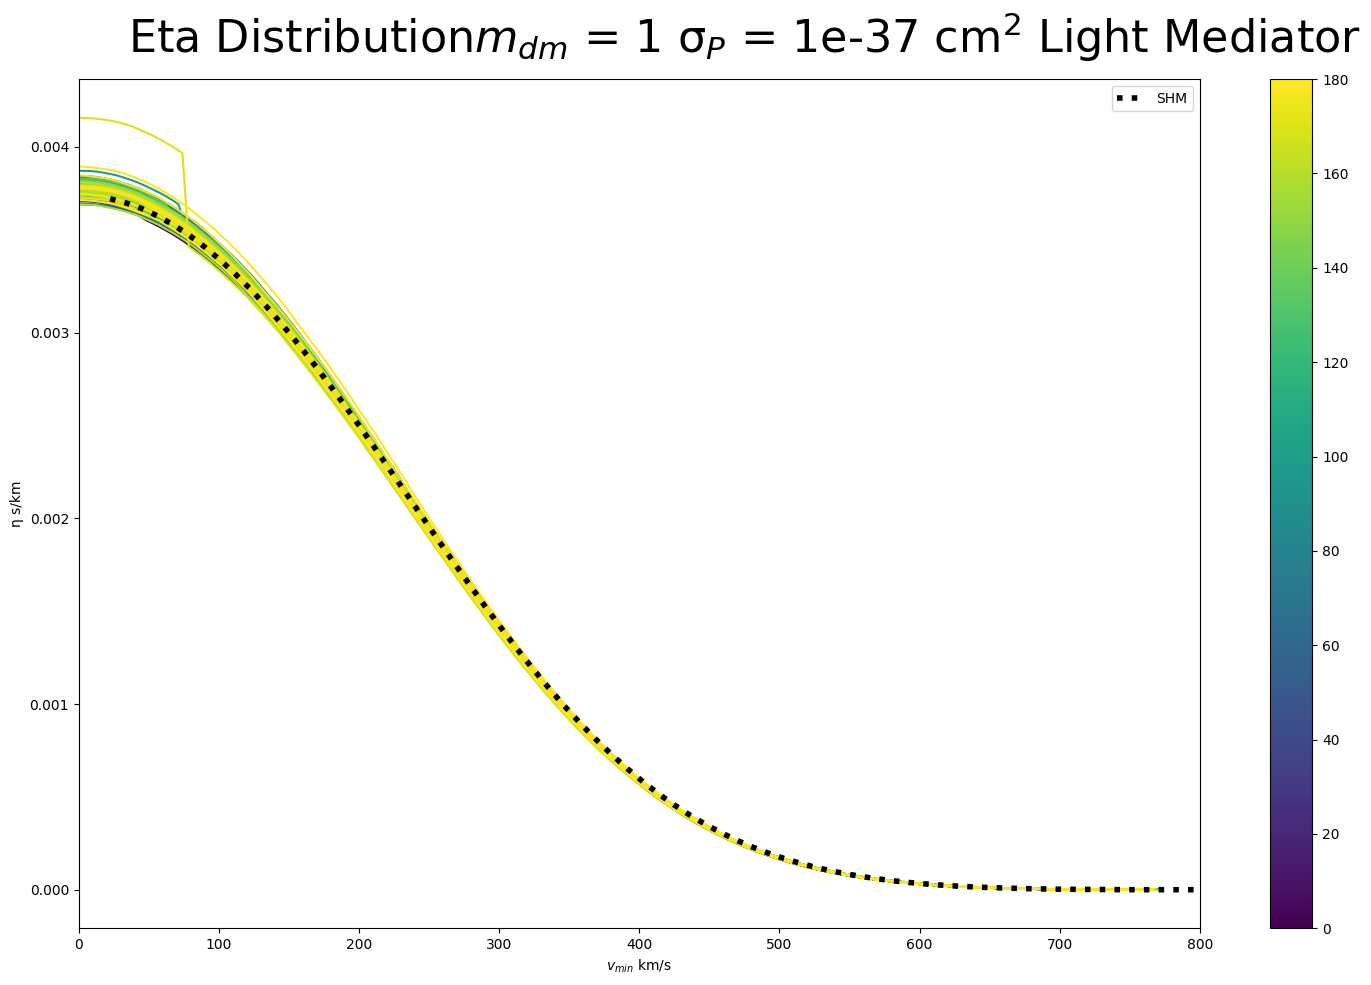

In [15]:
plot_damascus_output('sensei_mX1_sigma1e-37_LM',1,1e-37,num_angles=180,rhoX = 0.3,heavy=False)

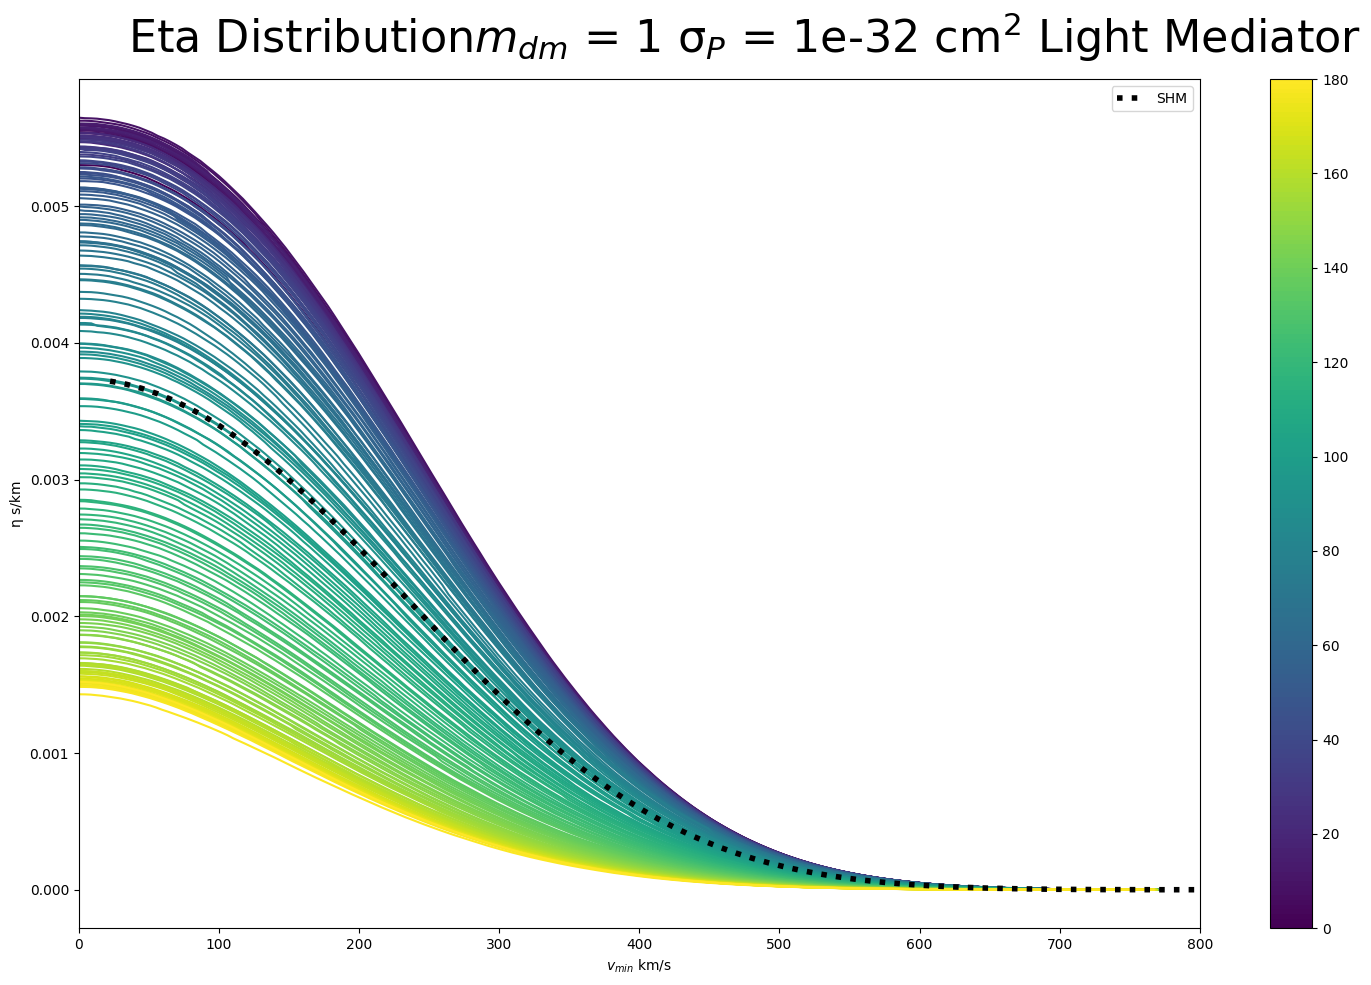

In [14]:
plot_damascus_output('sensei_mX1_sigma1e-32_LM',1,1e-32,num_angles=180,rhoX = 0.3,heavy=False)

In [ ]:
plot_damascus_output('2.7MeV_1e-34_LM',2.7,num_angles=60,heavy=False)

In [ ]:
# ratios = plot_speed_output('2.7MeV_1e-34_Scr_histograms',2.7,num_angles=60,set_max=False)

In [ ]:
# plot_damascus_output('2.7MeV_1e-34_Scr_histograms',2.7,num_angles=60,ratios=ratios)

In [ ]:
fname_rhoDam = f'./results/{dirname}.rho'
fdata = np.loadtxt(fname_rhoDam,delimiter='\t')
rho = fdata[:,1]
for isoangle in range(0,num_angles):
    fname_DAMASCUS = f'./results/{dirname}_histograms/eta.{isoangle}'
    
    fdata = np.loadtxt(fname_DAMASCUS,delimiter='\t')
    vmin = fdata[:,0] * s/km
    eta = fdata[:,1]*km/s
    # print(rho[isoangle]/rhoX,rhoX,rho[isoangle])
    eta*=(rho[isoangle]/rhoX)
    ax.plot(vmin,eta,color=cmap(isoangle))

In [1]:

import sys
import os
sys.path.append('../sensei_toy_limit/python/theory_tools/QEDark')   
from scipy.interpolate import CubicSpline
import torch
import numpy as np
from QEDark3 import QEDark
from QEDarkConstants import lightSpeed_kmpers
import matplotlib.pyplot as plt
import matplotlib


golden = (1 + 5 ** 0.5) / 2
goldenx = 15
goldeny = goldenx / golden
plt.figure(figsize=(goldenx,goldeny))

# mediator = "LM"
if FDMn == 0:
    mediator = "Scr"
else:
    mediator = "LM"
from QEDarkConstants import ccms,sec2yr,lightSpeed,lightSpeed_kmpers
mX_str = float(test_mX)
mX_str = np.round(mX_str,3)

# if mass_string.is_integer():
#     mass_string = int(mass_string)
# else:
mX_str = str(mX_str)
mX_str = mX_str.replace('.',"_")
QE_Modulated_Halo = QEDark()
QE_Modulated_Halo.update_params(220,232,544,0.3e9,1e-36)

q_tensor = torch.arange(0,QE_Modulated_Halo.nq+1)
Ee_tensor = torch.arange(QE_Modulated_Halo.Emin,QE_Modulated_Halo.Emax,step = QE_Modulated_Halo.dE)

halo_model = 'modulated'

vMins = QE_Modulated_Halo.DM_Halo.vmin_tensor(Ee_tensor,q_tensor,test_mX*1e6)*lightSpeed_kmpers


shm_eta = QE_Modulated_Halo.get_halo_data(test_mX*1e6,q_tensor,Ee_tensor,FDMn,'imb')
prefactor =ccms**2*sec2yr*QE_Modulated_Halo.rhoX/test_mX * QE_Modulated_Halo.cross_section #turns s/cm into 1/year
updated_eta =shm_eta/prefactor 
updated_eta*= 1e11
cmap = plt.get_cmap('viridis', 180) 
fname_rhoDam = f'./results/results/mX1_0_sigma8.73e-32_fdm2_long.cfg.rho'
steps = len(os.listdir('./results/results/mX1_0_sigma8.73e-32_fdm2_long.cfg_histograms/'))
actual_angle = np.linspace(0,180,steps)

rhoX = 0.3

km = 5.067*1e18
s = 1.51905*1e24
for isoangle in range(steps):
    ai = actual_angle[isoangle]
    ai = round(ai)
    # print(isoangle,ai,cmap(ai))

    fname = f'./results/results/mX1_0_sigma8.73e-32_fdm2_long.cfg_histograms/eta.{isoangle}'
    # fname_DAMASCUS = f'./DaMaSCUS/results/5MeV_test_histograms/eta.{isoangle}'
    fdata = np.loadtxt(fname,delimiter='\t')
    vmin = fdata[:,0] * s/km
    eta = fdata[:,1]*km/s
    # print(rho[isoangle]/rhoX,rhoX,rho[isoangle])
    eta*=(rho[isoangle]/rhoX)

    plt.plot(vmin,eta,color=cmap(ai))



plt.xlim([0, 700])

ax = plt.gca()

# EE_Index = 0
norm = matplotlib.colors.Normalize(vmin=0, vmax=180) 

sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm) 
# for i in range(35):
#     ax.plot(vMins[EE_Index,:],all_etas[i][EE_Index,:],color=cmap(i))
# ax.set_xlim([0, 800])
plt.plot(vMins[0,1:],updated_eta[0,1:],linewidth=4,ls=':',color='black',label='SHM')
plt.legend(prop={'size': 16},loc=3)
plt.xlabel('$v_{\mathrm{min}}$ [km/s]')
plt.ylabel('$\eta$ [s/km]')
plt.colorbar(sm,ax=ax)
# fig.suptitle('Ansh Recreation $m_{dm}$' + f' = {test_mX} σ$_E$ = {cross_section} cm$^2$',fontsize=32)
# title = '$m_{\chi} =$ ' + f'{test_mX} MeV' + ' $\overline{\sigma}_e = $ ' + cs_str
# plt.title(title)

if FDMn == 2:
    plt.text(0.99,0.95,'$F_{\mathrm{DM}} = \\alpha m_e / q^2$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
else:
    plt.text(0.99,0.95,'$F_{\mathrm{DM}} = 1$',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)

plt.text(0.99,0.87,'$\overline{\sigma}_{e} =$ ' + cs_str,fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)
plt.text(0.99,0.80,'$m_\chi=$ ' + f'{test_mX} MeV',fontsize=32,color='black',horizontalalignment='right',verticalalignment='center',transform = ax.transAxes)





# fname_max = f'./halo_data/modulated/Parameter_Scan_{mediator}/mDM_{mX_str}_MeV_sigmaE_{cross_section}_cm2/DM_Eta_theta_{steps-1}.txt'
# fname_min = f'./halo_data/modulated/Parameter_Scan_{mediator}/mDM_{mX_str}_MeV_sigmaE_{cross_section}_cm2/DM_Eta_theta_{0}.txt'

# fdata_min = np.loadtxt(fname_min,delimiter='\t')
# x1 = vmin = fdata_min[:,0]
# y1 = fdata_min[:,1]

# fdata_max = np.loadtxt(fname_max,delimiter='\t')
# x2 = fdata_max[:,0]
# y2  = fdata_max[:,1]
# spl_high = CubicSpline(x2,y2)
# spl_low= CubicSpline(x1,y1)

# x = np.linspace(0,800,200)
# y1 = spl_low(x)
# y2 = spl_high(x)


# polygon = plt.fill_between(x, y1, y2, lw=0, color='none')
# xlim = plt.xlim()
# ylim = plt.ylim()
# verts = np.vstack([p.vertices for p in polygon.get_paths()])
# gradient = plt.imshow(np.linspace(0, 1, 180).reshape(-1, 1), cmap='viridis', aspect='auto',
#                     extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()])
# gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
# plt.xlim(xlim)
# plt.ylim(ylim)



plt.tight_layout()
plt.savefig(f'../../../../ModulationFigs/Misc/Eta_{test_mX}MeV_{cross_section}sigmaE_FDM{FDMn}.pdf')
plt.show()
plt.close


<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:96: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\o'
<>:99: SyntaxWarning: invalid escape sequence '\c'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:96: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\o'
<>:99: SyntaxWarning: invalid escape sequence '\c'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_56649/2321684220.py:86: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$v_{\mathrm{min}}$ [km/s]')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_56649/2321684220.py:87: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$ [s/km]')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_566

FileNotFoundError: ./Si_f2.txt not found.

In [ ]:
import numpy as np
np.sqrt(218.022**2 + 33.198**2 + 33.198**2)

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from QEDark3 import QEDark
QE = QEDark()
dir = f'./halo_data/modulated/Parameter_Scan_Scr/'
directories = os.listdir(dir)
masses =[]
cross_sections = []
for d in directories:
    if 'Store' in d:
        continue
    mass = re.findall('DM_.*_MeV',d)[0][3:-4]
    mass = mass.replace('_','.')
    cross_section = re.findall('P_.*cm',d)[0][2:-3].replace('_','.')
    mass = float(mass)
    cross_section = float(cross_section)
    masses.append(mass)
    cross_sections.append(cross_section)

cross_sections= np.array(cross_sections)
masses = np.array(masses)
sigmaEs = []
for i in range(len(cross_sections)):
    sigmaE =  cross_sections[i]* (QE.mu_Xe(masses[i])/QE.mu_XP(masses[i]))**2
    sigmaEs.append(sigmaE)
sigmaEs = np.array(sigmaEs)
                               

# fig,ax = plt.subplots(figsize=(15,10))

# ax.scatter(masses,cross_sections)
# ax.set_ylabel('σP')
# ax.set_xlabel('mΧ')
# fig.suptitle('Mass and σP Grid Heavy Mediator',fontsize=32)
# plt.tight_layout()


fig,ax = plt.subplots(figsize=(15,10))

ax.scatter(masses,sigmaEs)
ax.set_ylabel('σE')
ax.set_xlabel('mΧ')
ax.set_xscale('log')
ax.set_yscale('log')

fig.suptitle('Mass and σE Grid Heavy Mediator',fontsize=32)
plt.tight_layout()


In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from QEDark3 import QEDark
QE = QEDark()
dir = f'./halo_data/modulated/Parameter_Scan_LM/'
directories = os.listdir(dir)
masses =[]
cross_sections = []
for d in directories:
    if 'Store' in d:
        continue
    mass = re.findall('DM_.*_MeV',d)[0][3:-4]
    mass = mass.replace('_','.')
    cross_section = re.findall('P_.*cm',d)[0][2:-3].replace('_','.')
    mass = float(mass)
    cross_section = float(cross_section)
    masses.append(mass)
    cross_sections.append(cross_section)

cross_sections= np.array(cross_sections)
sigmaEs = []
masses = np.array(masses)

for i in range(len(cross_sections)):
    mass = masses[i]
    sigmaE =  cross_sections[i]* (QE.mu_Xe(mass)/QE.mu_XP(mass))**2
    sigmaEs.append(sigmaE)
sigmaEs = np.array(sigmaEs)
# fig,ax = plt.subplots(figsize=(15,10))

# ax.scatter(masses,cross_sections)
# ax.set_ylabel('σP')
# ax.set_xlabel('mΧ')
# fig.suptitle('Mass and σP Grid Light Mediator',fontsize=32)
# plt.tight_layout()


fig,ax = plt.subplots(figsize=(15,10))

ax.scatter(masses,sigmaEs)
ax.set_ylabel('σE')
ax.set_xlabel('mΧ')
ax.set_xscale('log')
ax.set_yscale('log')
fig.suptitle('Mass and σE Grid Light Mediator',fontsize=32)
plt.tight_layout()


In [ ]:
from DaMaSCUS_helper import DaMaSCUS_helper
test = DaMaSCUS_helper()
test.update_samplesize(1000000)
mX = 2.7
# sigmaP = test.sigmaE_to_sigmaP(1e-35,mX)
sigmaE = test.sigmaP_to_sigmaE(1e-34,mX)
print(sigmaE)
# print(sigmaE,sigmaP)
sigmaE = float(format(sigmaE,'0.2e'))
print(sigmaE)
# test.run_simulation(mX,sigmaE,0,ncores=14)
# test.run_simulation(mX,sigmaE,2,ncores=14)


In [2]:
from DaMaSCUS_helper import DaMaSCUS_helper
test = DaMaSCUS_helper()
sigmaE = test.sigmaP_to_sigmaE(1.6e-29,0.64)
sigmaE

3.157929284592262e-30

In [21]:
from DaMaSCUS_helper import DaMaSCUS_helper
test = DaMaSCUS_helper()
test.update_isorings(36)
test.update_samplesize(10000)
mX = 0.64
sigmaE = test.sigmaP_to_sigmaE(1.6e-29,mX)
sigmaE
test.run_simulation(mX,sigmaE,0,ncores=7)


##############################
DaMaSCUSv1.0 - Simulation

Starting Time: Thu Jul 25 11:26:19 2024
Simulation ID: sensei_mX0.64_sigma1.6e-29_fdm0

Creating logfile.
Creating folder for velocity data.
The folder already exists, data will be overwritten.

Start initial MC simulation run without DM scatterings.
	Initial run finished	(4 s).

Start main MC simulation run with scatterings.
	DM mass [MeV]:	0.64
	Sigma [cm^2]:	1.6e-29
	Form factor:	ChargeScreening
	Mean free path:
		Core [rEarth]:		0.0262003
		Mantle [rEarth]:	0.0550325

Main MC run finished	(444 s).

Processing Time:	449.184s (0:7:29:184).
##############################

////////////////////////////////////////////////////

//Simulation end: Thu Jul 25 11:33:48 2024

//Results
	Data points per iso-ring:	10003
	Simulated particles:		1.6796e+07
	Particles below vcutoff:	0 %
	Free particles:			6.18646 %
	Scatterings pp:			41.2065
	Depth crossing pp:		1.9989	(1.99911)

	Av. Number Density[cm^-3]:	469.014
	Av. Energy Density[GeV c

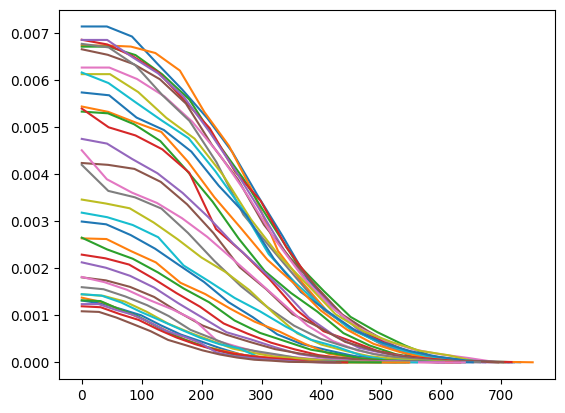

In [5]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(36):
    file = f'../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/Parameter_Scan_Scr/mDM_0_64_MeV_sigmaE_3.157929284592262e-30_cm2/DM_Eta_theta_{i}.txt'

    result = np.loadtxt(file,delimiter='\t')
    eta = result[:,1]
    vmin = result[:,0]
    plt.plot(vmin,eta)





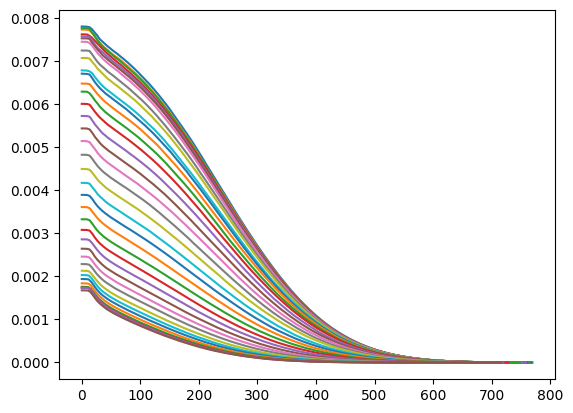

In [19]:
# mDM_1000_0_MeV_sigmaE_6.16e-36_cm2
import matplotlib.pyplot as plt
import numpy as np
for i in range(36):
    file = f'../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/Parameter_Scan_Scr_1mil/mDM_200_0_MeV_sigmaE_4.28e-39_cm2/DM_Eta_theta_{i}.txt'

    result = np.loadtxt(file,delimiter='\t')
    eta = result[:,1]
    vmin = result[:,0]
    plt.plot(vmin,eta)
# plt.yscale('log')





In [2]:
from tqdm.autonotebook import tqdm
from DaMaSCUS_helper import DaMaSCUS_helper

import numpy as np
damascus = DaMaSCUS_helper()
dm_masses = np.concatenate((np.arange(1.1,2,0.1),np.arange(2,5,0.2),np.arange(5,11,1),np.array([20,50,100])))
# cross_sec_grid = np.array([1e-27,1e-28,1e-29,1e-30,1e-31,1e-32,1e-33,1e-34,5e-34,1e-35,5e-35,1e-36,5e-36,1e-37])#,5e-37,1e-38,5e-38,1e-39,5e-39])#,1e-40])
# cross_sec_grid = np.array([1e-29,1e-30,1e-31,
cross_sec_grid = np.logspace(-39,-27,num=20)

# np.array([1e-32,1e-33,1e-34,5e-34,1e-35,5e-35,1e-36,5e-36,1e-37,5e-37,1e-38,5e-38,1e-39,5e-39])#,1e-40])
cross_sec_grid
fdm = 0
damascus.update_samplesize(1000000)
damascus.update_isorings(60)
for sE in tqdm(range(len(cross_sec_grid))):
    for m in tqdm(range(len(dm_masses))):
        for fdm in [0,2]:
            mX = dm_masses[m]
            sigmaE = cross_sec_grid[sE]      
            sigmaE = float(format(sigmaE, '.3g')) 
            damascus.run_simulation(mX,sigmaE,fdm,ncores='all',overwrite=False)

array([1.00000000e-39, 3.79269019e-39, 1.43844989e-38, 5.45559478e-38,
       2.06913808e-37, 7.84759970e-37, 2.97635144e-36, 1.12883789e-35,
       4.28133240e-35, 1.62377674e-34, 6.15848211e-34, 2.33572147e-33,
       8.85866790e-33, 3.35981829e-32, 1.27427499e-31, 4.83293024e-31,
       1.83298071e-30, 6.95192796e-30, 2.63665090e-29, 1.00000000e-28])

In [4]:
cross_sec_grid = np.logspace(-39,-27,num=20)

for cs in cross_sec_grid:
    sigmaE = float(format(cs, '.3g')) 
    print(sigmaE)

1e-39
4.28e-39
1.83e-38
7.85e-38
3.36e-37
1.44e-36
6.16e-36
2.64e-35
1.13e-34
4.83e-34
2.07e-33
8.86e-33
3.79e-32
1.62e-31
6.95e-31
2.98e-30
1.27e-29
5.46e-29
2.34e-28
1e-27


In [ ]:
import os
os.system('ls ../sensei_toy_limit/python/theory_tools/QEDark/halo_data/modulated/Parameter_Scan_Scr/mDM_2.7_MeV_sigmaE_1e-36_cm2/DM_Eta_theta_0.txt')